# Visualization Multi Objective, N-dimensional

## Imports

In [229]:
# Enable autoreload
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Packages

In [230]:
import os
import ast
import json
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import ScalarFormatter, LogLocator, FuncFormatter, MaxNLocator

In [231]:
from src.plots import plot_param_relationships, plot_3d_results_with_target_range, plot_3d_in_out_interactive
# from src.h

### Input 

In [372]:
# log_name = 'LoanApp_SR_S1'
# log_name = 'LoanApp_SR_S2'
# log_name = 'LoanApp_SR_S3'
log_name = 'LoanApp_SR_S4_3'

# log_name = 'LoanApp_SingleRole'
# log_name = 'LoanApp_SingleRole_fixDuration' 
# log_name = 'ten_activities'
# log_name = 'LoanApp_TwoRoles'




if log_name == 'LoanApp_SR_S1':
    experiment_name = '20251125_230351_2D_1PPIs_30n_0.9a_0.85b_paper_S1'

if log_name == 'LoanApp_SR_S2':
    experiment_name = '20251125_230354_2D_1PPIs_30n_0.9a_0.85b_paper_S2'

if log_name == 'LoanApp_SR_S3':
    experiment_name = '20251125_230513_2D_2PPIs_30n_0.9a_0.85b_paper_S3'

if log_name == 'LoanApp_SR_S4_3':
    experiment_name = '20251125_230559_3D_2PPIs_30n_0.9a_0.75b_paper_S4'
    

if log_name == 'LoanApp_SingleRole':
    experiment_name = '20251115_183049_3D_2PPIs_10n_0.95a_0.9b'

if log_name == 'LoanApp_TwoRoles':
    experiment_name = '20251112_141621'

if log_name == 'LoanApp_SingleRole_fixDuration':
    experiment_name = '20251114_142758' 

if log_name == 'ten_activities' :
    experiment_name = '20251107_175045_onlyCost' # only cost



data_dir = os.path.join('data')


### Data

In [373]:
# experiment_path = os.path.join(data_dir, log_name, 'output', experiment_name)
output_dir = os.path.join('data', log_name, 'output', experiment_name)
output_figures_path = os.path.join(output_dir, 'figures')
results_df_path = os.path.join(output_dir, 'simulation_log.csv')
params_path     = os.path.join(output_dir, 'params.json')

In [374]:
# Create output directories for figures
os.makedirs(output_figures_path, exist_ok=True)

In [375]:
# read in params
with open(params_path, 'r') as f:
    params = json.load(f) 

In [376]:
# read in results dataframe
results_df = pd.read_csv(results_df_path)

In [377]:
# convert columns with string representations of dicts/lists back to actual dicts/lists
dict_columns = ['target_range', 'target_ppi_means', 'target_ppi_dict', 'target_ppis']
for col in dict_columns:
    results_df[col] = results_df[col].apply(ast.literal_eval)

In [378]:

# sampled_points_path = params['strategies']['quadtree']['paths']['sampled_points']
sampled_points_path = os.path.join(output_dir, 'hyperquadtree_sampled_points.csv')
hqt_df = pd.read_csv(sampled_points_path)

In [379]:
params

{'base_path': 'data/LoanApp_SR_S4_3',
 'beta': 0.75,
 'bpmn_path': 'data/LoanApp_SR_S4_3/LoanApp_SR_S4_3.bpmn',
 'calculate_stats': 'custom',
 'cases_to_simulate': 300,
 'confidence': 0.9,
 'decimals': 3,
 'execute_strategy': ['hyperquadtree'],
 'experiment_output_dir': 'data/LoanApp_SR_S4_3/output/20251125_230559_3D_2PPIs_30n_0.9a_0.75b',
 'in_out_criteria': 'confidence',
 'input_parameters': {'arriaval_distr_mean': {'min_step_size': 150.0,
   'type': 'cont',
   'values': [0, 7450]},
  'branching_probability': {'min_step_size': 0.1,
   'type': 'cont',
   'use': ['node_51629ebf-d0e1-49e5-ac00-74cb1ead72c6'],
   'values': [0, 1]},
  'resource_count': {'ignore': ['applicant'],
   'min_step_size': 1,
   'type': 'disc',
   'values': [1, 20]}},
 'json_path': 'data/LoanApp_SR_S4_3/LoanApp_SR_S4_3.json',
 'json_path_temp': 'data/LoanApp_SR_S4_3/LoanApp_SR_S4_3_temp.json',
 'nr_simulations_per_scenario': 30,
 'output_params_path': 'data/LoanApp_SR_S4_3/output/20251125_230559_3D_2PPIs_30n_0.9a_

In [380]:
params['viz'] = {
    # 'x_param': None, # 'arriaval_distr_mean',
    # 'y_param': None, # 'resource_count_UnifiedResourceProfile',
    # 'z_col':  None, # params['target_ppi'],
    'output_figures_path': output_figures_path,
    'figure_extensions': ['.png', '.eps', '.pdf'],
    'plot_2d': True,
    'plot_3d_ppi': True,
    'plot_3d_InOut': False,
    '2d_params': {
        'x_param': None,
        'y_param': None,
        'target_ppi': None,
    },
    '3d_ppi_params': {
        'x_param': None,    
        'y_param': None,
        'z_col': None,
    },
    '3d_InOut_params': {
        'x_param': None,    
        'y_param': None,
        'z_param': None,
    }
}

In [381]:
params_to_change = list(params['params_to_change'].keys())
target_ppis = params['target_ppis']

if len(params_to_change) == 2:

    params['viz']['2d_params']['x_param'] = params_to_change[0]
    params['viz']['2d_params']['y_param'] = params_to_change[1]
    params['viz']['plot_3d_ppi'] = True

    if len(target_ppis) == 1:
        params['viz']['3d_ppi_params']['x_param'] = params_to_change[0]
        params['viz']['3d_ppi_params']['z_param'] = params_to_change[1]
        params['viz']['3d_ppi_params']['y_col'] = target_ppis
    
    else:
        params['viz']['plot_3d_ppi'] = False

if len(params_to_change) != 2: 
    params['viz']['plot_2d'] = False
    params['viz']['plot_3d_ppi'] = False

if len(params_to_change) == 3: 
    params['viz']['plot_3d_InOut'] = True
    params['viz']['3d_InOut_params'] = {
        'x_param': params_to_change[0],
        'y_param': params_to_change[1],
        'z_param': params_to_change[2],
    }

if len(params_to_change) == 3: 
    for param in params_to_change:

        if 'resource_count' in param:
            params['viz']['3d_InOut_params']['x_param'] = param
        if 'arriaval_distr_mean' in param:
            params['viz']['3d_InOut_params']['y_param'] = param
        if 'branching_probability' in param:
            params['viz']['3d_InOut_params']['z_param'] = param

print(params['viz']['plot_3d_ppi'])


False


In [382]:
plot_vars = { 
    'label_size': 34,                      # Size of axis labels
    'tick_size': 24,                       # Size of tick labels
    'figure_size': (8, 8),                 # Reduced height for the figure
    'tree_node_colour': 'blue',        # Color of the tree nodes
    'plot_title': False,                      # Whether to display the plot title
    'plot_legend': False,                     # Whether to display the legend
    'legend_location': 'best',               # Location of the legend
    'legend_size': 12,                      # Font size of the legend
    'line_width': 1.5,                     # Line width for the edges of the bars
    'transparancy': 0.375,                        # Transparency of the bars
    'grid_alpha': 0.3,                     # Transparency of the grid


    # 'x_label': 'Avg. lead times (hours)',  # Label for the x-axis
    # 'y_label': 'Frequency',                # Label for the y-axis
    # 'vertical_line_color': 'blue',         # Color of the vertical line
    # 'vertical_line_width': 4               # Thickness of the vertical line
    'label_dict': {
        'resource_count_': 'Number of resources',
        # 'arriaval_distr_mean': 'Arrival distribution mean (m)',
        'arriaval_distr_mean': 'Arrival times (m)',
        'branching_probability': 'Branching probability',
        'cost': 'Cost',
        'cycle_time': 'Cycle Time',
        'lead_time': 'Lead time',
    }
}
params['viz']['plot_vars'] = plot_vars



### Test

In [383]:
print((hqt_df.head()))

   dim_0_min  dim_1_min  dim_2_min  dim_0_max  dim_1_max  dim_2_max  depth  \
0        0.0          1        0.0     7450.0         20        1.0      1   
1        0.0          1        0.0     3725.0         10        0.5      2   
2        0.0          1        0.5     3725.0         10        1.0      2   
3        0.0         10        0.0     3725.0         20        0.5      2   
4        0.0         10        0.5     3725.0         20        1.0      2   

   is_leaf     status  
0    False  out_range  
1    False  out_range  
2    False  out_range  
3    False  out_range  
4    False  out_range  


In [384]:
print(params['viz'])

{'output_figures_path': 'data/LoanApp_SR_S4_3/output/20251125_230559_3D_2PPIs_30n_0.9a_0.75b_paper_S4/figures', 'figure_extensions': ['.png', '.eps', '.pdf'], 'plot_2d': False, 'plot_3d_ppi': False, 'plot_3d_InOut': True, '2d_params': {'x_param': None, 'y_param': None, 'target_ppi': None}, '3d_ppi_params': {'x_param': None, 'y_param': None, 'z_col': None}, '3d_InOut_params': {'x_param': 'resource_count_unified_resource_profile', 'y_param': 'arriaval_distr_mean', 'z_param': 'branching_probability_node_51629->node_75a93'}, 'plot_vars': {'label_size': 34, 'tick_size': 24, 'figure_size': (8, 8), 'tree_node_colour': 'blue', 'plot_title': False, 'plot_legend': False, 'legend_location': 'best', 'legend_size': 12, 'line_width': 1.5, 'transparancy': 0.375, 'grid_alpha': 0.3, 'label_dict': {'resource_count_': 'Number of resources', 'arriaval_distr_mean': 'Arrival times (m)', 'branching_probability': 'Branching probability', 'cost': 'Cost', 'cycle_time': 'Cycle Time', 'lead_time': 'Lead time'}}}


In [385]:
results_df.columns


Index(['algorithm', 'simulation_id', 'timestamp', 'target_range', 'status',
       'target_ppis', 'target_ppi_means', 'target_ppi_dict',
       'arriaval_distr_mean', 'resource_count_unified_resource_profile',
       'branching_probability_node_51629->node_75a93'],
      dtype='object')

In [386]:
# print(results_df.head())
results_df.head()


,algorithm,simulation_id,timestamp,target_range,status,target_ppis,target_ppi_means,target_ppi_dict,arriaval_distr_mean,resource_count_unified_resource_profile,branching_probability_node_51629->node_75a93
0,hyperquadtree_midpoints,0,2025-11-25T22:06:07.854890Z,"{'lead_time': [0, 39600], 'cost': [0, 60000]}",False,"[lead_time, cost]","{'lead_time': 12390770.362422947, 'cost': 1935...","{'lead_time': [12391273.933328697, 12198208.71...",0.0,1,0.0
1,hyperquadtree_midpoints,1,2025-11-25T22:06:12.760515Z,"{'lead_time': [0, 39600], 'cost': [0, 60000]}",False,"[lead_time, cost]","{'lead_time': 9942060.104032394, 'cost': 16664...","{'lead_time': [10137041.537283558, 10060100.23...",0.0,1,1.0
2,hyperquadtree_midpoints,2,2025-11-25T22:06:23.262589Z,"{'lead_time': [0, 39600], 'cost': [0, 60000]}",False,"[lead_time, cost]","{'lead_time': 604256.3856466868, 'cost': 20100...","{'lead_time': [599739.5232667767, 603745.60976...",0.0,20,0.0
3,hyperquadtree_midpoints,3,2025-11-25T22:06:29.876059Z,"{'lead_time': [0, 39600], 'cost': [0, 60000]}",False,"[lead_time, cost]","{'lead_time': 354002.58638818725, 'cost': 1773...","{'lead_time': [348552.51970869995, 384233.0611...",0.0,20,1.0
4,hyperquadtree_midpoints,4,2025-11-25T22:06:36.492631Z,"{'lead_time': [0, 39600], 'cost': [0, 60000]}",False,"[lead_time, cost]","{'lead_time': 6180491.002873589, 'cost': 19356...","{'lead_time': [6243944.51427388, 6051670.00473...",7450.0,1,0.0


In [387]:
# type(results_df.loc[0, 'target_range'])
# d = results_df.loc[0, 'target_range']
# print(d.keys(), d.values())
# type((d['cost'][1]))

In [388]:
type(results_df.loc[0, 'target_ppis'])

list

## Preparation

### Directory preparation

### Dataframe prep

#### Removal of unnecessary params

In [389]:
# Drop the columns 'ppi_value' and 'distance' if they exist in the DataFrame
columns_to_drop = ['ppi_value', 'distance']
results_df = results_df.drop(columns=[col for col in columns_to_drop if col in results_df.columns])


#### Backwards comparability creation

In [390]:
# Version connectivity of naming
results_df = results_df.rename(columns={'target_ppi_mean': 'target_ppi_val'})

# if the column status is present, replace True with "in" and False with "out"
if 'status' in results_df.columns:
    results_df['status'] = results_df['status'].replace({True: 'in', False: 'out'})

## Plotting Functions

### 2 D

#### param x param

### 3 D

## Visulaize

### Prep

In [391]:
algorithms = results_df['algorithm'].unique().tolist()

In [392]:

def get_label(param_name, label_dict):
    for key in label_dict.keys():
        if param_name.startswith(key):
            label = label_dict[key]
            return label


### Plot

### 2D

In [393]:
# from src.plots import plot_gs_hqt_overlay

if params['viz']['plot_2d']:
    algorithms_list = list(algorithms)
    print(algorithms_list)
    always_include = ['grid_search', 'orig_run']
    algorithms_list = [alg for alg in algorithms if alg not in always_include]
    algorithms_list

    if algorithms_list == []:
        algorithms_list = ['grid_search']

    for algorithm in algorithms_list:

        print(f"\n ### Generating 3D plot for algorithm: {algorithm}")
        # Create a copy of the dataframe
        filtered_df = results_df.copy()

        algorithms_to_plot = always_include.copy()
        algorithms_to_plot.append(algorithm)

        # Filter the dataframe for 'grid_search' and one other algorithm (e.g., 'hill_descent_random_one')
        filtered_df = filtered_df[filtered_df['algorithm'].isin(algorithms_to_plot)]

        target_range = params['target_range']
        plot_gs_hqt_overlay_with_areas(results_df, params, hqt_df=hqt_df)#(filtered_df, algorithms=algorithms, params=params)




In [394]:
# from src.plots import plot_param_relationships

if params['viz']['plot_2d']:
    algorithms_list = list(algorithms)
    print(algorithms_list)
    always_include = ['grid_search', 'orig_run']
    algorithms_list = [alg for alg in algorithms if alg not in always_include]
    algorithms_list

    if algorithms_list == []:
        algorithms_list = ['grid_search']

    for algorithm in algorithms_list:

        print(f"\n ### Generating 3D plot for algorithm: {algorithm}")
        # Create a copy of the dataframe
        filtered_df = results_df.copy()

        algorithms_to_plot = always_include.copy()
        algorithms_to_plot.append(algorithm)

        # Filter the dataframe for 'grid_search' and one other algorithm (e.g., 'hill_descent_random_one')
        filtered_df = filtered_df[filtered_df['algorithm'].isin(algorithms_to_plot)]

        target_range = params['target_range']
        plot_param_relationships(filtered_df, algorithms=algorithms, params=params)




### 3D

In [395]:


if params['viz']['plot_3d_ppi']:

    for algorithm in algorithms:
        if algorithm != 'orig_run':
                
            print(f"\n ### Generating scatter plots for algorithm: {algorithm}") 

            # Define the columns for the axes
            x_col = params['viz']['3d_ppi_params']['x_param']
            z_col = params['viz']['3d_ppi_params']['z_param']
            
            
            y_col_values = params['viz']['3d_ppi_params']['y_col']
            for y_col in y_col_values:
                print(f"Plotting for y_col: {y_col}")

                # Call the function to plot the 3D graph
                upperbound = params['target_range'][y_col][1]
                y_max_value = upperbound * 2.5
                plot_3d_results_with_target_range(results_df, params, algorithm,  x_col, z_col, y_col, params['target_range'][y_col], use_log_scale=True, draw_plane=False)
                plot_3d_results_with_target_range(results_df, params, algorithm,  x_col, z_col, y_col, params['target_range'][y_col], use_log_scale=False, draw_plane=False, y_max_value=y_max_value)
                # plot_3d_results_with_target_range(results_df, algorithm, x_col, z_col, y_col, params['target_range'], use_log_scale=False, draw_plane=False)

In [406]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

def plot_3d_hqt_leaf_nodes(hqt_df, params):
    """
    Plots a 3D space where each leaf node from the hqt_df is located and colored
    according to its classification.

    Args:
        hqt_df (pd.DataFrame): The DataFrame containing hyperquadtree data.
        params (dict): A dictionary containing simulation parameters, including "viz".

    Returns:
        None
    """
    # Extract plot variables
    plot_vars = params['viz']['plot_vars']
    label_dict = plot_vars['label_dict']

    label_size_reduction = 8
    tick_size_reduction = 8

    # Use get_label to dynamically infer axis labels
    x_label = get_label('arriaval_distr_mean', label_dict) or 'Dimension 0'  # X-axis label
    y_label = get_label('resource_count_', label_dict) or 'Dimension 1'  # Y-axis label
    z_label = get_label('branching_probability', label_dict) or 'Dimension 2'  # Z-axis label

    # Debugging: Print labels
    print("X Label:", x_label)
    print("Y Label:", y_label)
    print("Z Label:", z_label)

    # Create a 3D figure
    fig = plt.figure(figsize=(10, 8), constrained_layout=True)
    ax = fig.add_subplot(111, projection='3d')

    # Plot each leaf node as a 3D box
    for _, row in hqt_df.iterrows():
        if row['is_leaf']:  # Only plot areas for rows where is_leaf is True
            # Determine the color based on the status
            if row['status'] == 'mixed':
                color = 'white'
                alpha = 0.8
            elif row['status'] == 'in_range':
                color = 'green'
                alpha = 0.3
            elif row['status'] == 'out_range':
                color = 'red'
                alpha = 0.3
            else:
                continue  # Skip rows with unknown status

            # Define the vertices of the 3D box
            x = [row['dim_0_min'] / 60, row['dim_0_max'] / 60]  # Convert seconds to minutes for x-axis
            y = [row['dim_1_min'], row['dim_1_max']]
            z = [row['dim_2_min'], row['dim_2_max']]

            # Plot the 3D box as a transparent cuboid
            xx, yy = np.meshgrid(x, y)
            ax.plot_surface(xx, yy, np.full_like(xx, z[0]), color=color, alpha=alpha)  # Bottom face
            ax.plot_surface(xx, yy, np.full_like(xx, z[1]), color=color, alpha=alpha)  # Top face

            yy, zz = np.meshgrid(y, z)
            ax.plot_surface(np.full_like(yy, x[0]), yy, zz, color=color, alpha=alpha)  # Left face
            ax.plot_surface(np.full_like(yy, x[1]), yy, zz, color=color, alpha=alpha)  # Right face

            xx, zz = np.meshgrid(x, z)
            ax.plot_surface(xx, np.full_like(xx, y[0]), zz, color=color, alpha=alpha)  # Front face
            ax.plot_surface(xx, np.full_like(xx, y[1]), zz, color=color, alpha=alpha)  # Back face

    # Add axis labels using get_label
    ax.set_xlabel(x_label, fontsize=plot_vars['label_size'] - label_size_reduction, labelpad=11)
    ax.set_ylabel(y_label, fontsize=plot_vars['label_size'] - label_size_reduction, labelpad=11)
    ax.set_zlabel(z_label, fontsize=plot_vars['label_size'] - label_size_reduction, labelpad=11)

    # Ensure tick labels are visible
    ax.tick_params(axis='both', labelsize=plot_vars['tick_size'] - tick_size_reduction)

    # Rotate the plot for better visualization
    ax.view_init(elev=30, azim=45)  # Adjust elevation and azimuth angles

    title = params['process_name'] + "_3D_HQT_Leaf_Nodes"
    if plot_vars['plot_title']:
        ax.set_title(title, fontsize=plot_vars['label_size'])

    # Adjust layout to ensure labels are not cut off
    fig.subplots_adjust(left=0.15, right=0.95, top=0.92, bottom=0.12)

    # Save the plot
    log_name = params.get('process_name', 'log_name')
    fig_name = f'{log_name}_3D_HQT_Leaf_Nodes'

    for extension in params['viz']['figure_extensions']:
        plt.savefig(os.path.join(params['viz']['output_figures_path'], fig_name + extension), pad_inches=0.12)

    plt.show()

In [445]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

def plot_3d_hqt_leaf_nodes(hqt_df, params):
    """
    Plots a 3D space where each leaf node from the hqt_df is located and colored
    according to its classification.

    Args:
        hqt_df (pd.DataFrame): The DataFrame containing hyperquadtree data.
        params (dict): A dictionary containing simulation parameters, including "viz".

    Returns:
        None
    """
    # Extract plot variables
    plot_vars = params['viz']['plot_vars']
    label_dict = plot_vars['label_dict']

    label_size_reduction = 8
    tick_size_reduction = 8

    # Use get_label to dynamically infer axis labels
    x_label = get_label('arriaval_distr_mean', label_dict) or 'Dimension 0'  # X-axis label
    y_label = get_label('resource_count_', label_dict) or 'Dimension 1'  # Y-axis label
    z_label = get_label('branching_probability', label_dict) or 'Dimension 2'  # Z-axis label

    # Debugging: Print labels
    print("X Label:", x_label)
    print("Y Label:", y_label)
    print("Z Label:", z_label)

    # Create a 3D figure
    fig = plt.figure(figsize=(16, 12))  # Increase figure size
    ax = fig.add_subplot(111, projection='3d')

    # Plot each leaf node as a 3D box
    for _, row in hqt_df.iterrows():
        if row['is_leaf']:  # Only plot areas for rows where is_leaf is True
            # Determine the color based on the status
            if row['status'] == 'mixed':
                color = 'white'
                alpha = 0.8
            elif row['status'] == 'in_range':
                color = 'green'
                alpha = 0.3
            elif row['status'] == 'out_range':
                color = 'red'
                alpha = 0.3
            else:
                continue  # Skip rows with unknown status

            # Define the vertices of the 3D box
            x = [row['dim_0_min'] / 60, row['dim_0_max'] / 60]  # Convert seconds to minutes for x-axis
            y = [row['dim_1_min'], row['dim_1_max']]
            z = [row['dim_2_min'], row['dim_2_max']]

            # Plot the 3D box as a transparent cuboid
            xx, yy = np.meshgrid(x, y)
            ax.plot_surface(xx, yy, np.full_like(xx, z[0]), color=color, alpha=alpha)  # Bottom face
            ax.plot_surface(xx, yy, np.full_like(xx, z[1]), color=color, alpha=alpha)  # Top face

            yy, zz = np.meshgrid(y, z)
            ax.plot_surface(np.full_like(yy, x[0]), yy, zz, color=color, alpha=alpha)  # Left face
            ax.plot_surface(np.full_like(yy, x[1]), yy, zz, color=color, alpha=alpha)  # Right face

            xx, zz = np.meshgrid(x, z)
            ax.plot_surface(xx, np.full_like(xx, y[0]), zz, color=color, alpha=alpha)  # Front face
            ax.plot_surface(xx, np.full_like(xx, y[1]), zz, color=color, alpha=alpha)  # Back face

    # Add axis labels using get_label
    ax.set_xlabel(x_label, fontsize=plot_vars['label_size'] - label_size_reduction, labelpad=30)
    ax.set_ylabel(y_label, fontsize=plot_vars['label_size'] - label_size_reduction, labelpad=30)
    ax.set_zlabel(z_label, fontsize=plot_vars['label_size'] - label_size_reduction, labelpad=30)

    # Ensure tick labels are visible
    ax.tick_params(axis='both', labelsize=plot_vars['tick_size'] - tick_size_reduction)

    # Rotate the plot for better visualization
    ax.view_init(elev=30, azim=45)  # Adjust elevation and azimuth angles

    title = params['process_name'] + "_3D_HQT_Leaf_Nodes"
    if plot_vars['plot_title']:
        ax.set_title(title, fontsize=plot_vars['label_size'])

    # Adjust layout to ensure labels are not cut off
    fig.subplots_adjust(left=0.25, right=0.9, top=0.9, bottom=0.25)  # Increased margins

    # Save the plot with proper bounding box
    log_name = params.get('process_name', 'log_name')
    fig_name = f'{log_name}_3D_HQT_Leaf_Nodes'

    for extension in params['viz']['figure_extensions']:
        plt.savefig(os.path.join(params['viz']['output_figures_path'], fig_name + extension), bbox_inches='')

    plt.show()

In [477]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import os

def plot_3d_hqt_leaf_nodes(hqt_df, params):
    """
    Plots a 3D space where each leaf node from the hqt_df is located and colored
    according to its classification.

    Ensures that nothing (labels, ticks, title) is cut off.
    """
    # Extract plot variables
    plot_vars = params['viz']['plot_vars']
    label_dict = plot_vars['label_dict']

    label_size_reduction = 8
    tick_size_reduction = 8

    # Dynamically infer axis labels
    x_label = get_label('arriaval_distr_mean', label_dict) or 'Dimension 0'
    y_label = get_label('resource_count_', label_dict) or 'Dimension 1'
    z_label = get_label('branching_probability', label_dict) or 'Dimension 2'

    # Debugging: print labels
    print("X Label:", x_label)
    print("Y Label:", y_label)
    print("Z Label:", z_label)

    # Create a 3D figure with large size to avoid clipping
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot each leaf node as a 3D box
    for _, row in hqt_df.iterrows():
        if row['is_leaf']:
            if row['status'] == 'mixed':
                color = 'white'
                alpha = 0.8
            elif row['status'] == 'in_range':
                color = 'green'
                alpha = 0.2
            elif row['status'] == 'out_range':
                color = 'red'
                alpha = 0.5
            else:
                continue

            x = [row['dim_0_min'] / 60, row['dim_0_max'] / 60]
            y = [row['dim_1_min'], row['dim_1_max']]
            z = [row['dim_2_min'], row['dim_2_max']]

            # Bottom and top faces
            xx, yy = np.meshgrid(x, y)
            ax.plot_surface(xx, yy, np.full_like(xx, z[0]), color=color, alpha=alpha)
            ax.plot_surface(xx, yy, np.full_like(xx, z[1]), color=color, alpha=alpha)

            # Left and right faces
            yy, zz = np.meshgrid(y, z)
            ax.plot_surface(np.full_like(yy, x[0]), yy, zz, color=color, alpha=alpha)
            ax.plot_surface(np.full_like(yy, x[1]), yy, zz, color=color, alpha=alpha)

            # Front and back faces
            xx, zz = np.meshgrid(x, z)
            ax.plot_surface(xx, np.full_like(xx, y[0]), zz, color=color, alpha=alpha)
            ax.plot_surface(xx, np.full_like(xx, y[1]), zz, color=color, alpha=alpha)

    # Set axis labels with large labelpad
    ax.set_xlabel(x_label, fontsize=plot_vars['label_size'] - label_size_reduction, labelpad=10)
    ax.set_ylabel(y_label, fontsize=plot_vars['label_size'] - label_size_reduction, labelpad=10)
    ax.set_zlabel(z_label, fontsize=plot_vars['label_size'] - label_size_reduction, labelpad=10)

    # Tick labels
    ax.tick_params(axis='both', labelsize=plot_vars['tick_size'] - tick_size_reduction)

    # Rotate for better visualization
    ax.view_init(elev=30, azim=45)

    # Title
    title = params.get('process_name', 'Process') + "_3D_HQT_Leaf_Nodes"
    if plot_vars['plot_title']:
        ax.set_title(title, fontsize=plot_vars['label_size'], pad=10)

    # Adjust layout generously to avoid clipping
    fig.subplots_adjust(left=0.25, right=0.95, top=0.95, bottom=0.25)

    # Ensure tight layout for any remaining space
    fig.tight_layout(pad=3.0)

    # Save figure
    log_name = params.get('process_name', 'log_name')
    fig_name = f'{log_name}_3D_HQT_Leaf_Nodes'

    for extension in params['viz']['figure_extensions']:

        
        output_path = os.path.join(params['viz']['output_figures_path'], fig_name + extension)

        
        plt.savefig(output_path, bbox_inches='tight', pad_inches=0.5, dpi=1200)
        print(f"Saved figure to {output_path}")

    # Show plot
    plt.show()


In [485]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import os

def plot_3d_hqt_leaf_nodes(hqt_df, params):
    """
    Plots a 3D space where each leaf node from the hqt_df is located and colored
    according to its classification.

    Ensures that nothing (labels, ticks, title) is cut off.
    """
    # Extract plot variables
    plot_vars = params['viz']['plot_vars']
    label_dict = plot_vars['label_dict']

    label_size_reduction = 8
    tick_size_reduction = 8

    # Dynamically infer axis labels
    x_label = get_label('arriaval_distr_mean', label_dict) or 'Dimension 0'
    y_label = get_label('resource_count_', label_dict) or 'Dimension 1'
    z_label = get_label('branching_probability', label_dict) or 'Dimension 2'

    # Debugging: print labels
    print("X Label:", x_label)
    print("Y Label:", y_label)
    print("Z Label:", z_label)

    # Create a 3D figure with large size to avoid clipping
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot each leaf node as a 3D box
    for _, row in hqt_df.iterrows():
        if row['is_leaf']:
            if row['status'] == 'mixed':
                color = 'white'
                alpha = 0.8
            elif row['status'] == 'in_range':
                color = 'green'
                alpha = 0.2
            elif row['status'] == 'out_range':
                color = 'red'
                alpha = 0.5
            else:
                continue

            x = [row['dim_0_min'] / 60, row['dim_0_max'] / 60]
            y = [row['dim_1_min'], row['dim_1_max']]
            z = [row['dim_2_min'], row['dim_2_max']]

            # Bottom and top faces
            xx, yy = np.meshgrid(x, y)
            ax.plot_surface(xx, yy, np.full_like(xx, z[0]), color=color, alpha=alpha)
            ax.plot_surface(xx, yy, np.full_like(xx, z[1]), color=color, alpha=alpha)

            # Left and right faces
            yy, zz = np.meshgrid(y, z)
            ax.plot_surface(np.full_like(yy, x[0]), yy, zz, color=color, alpha=alpha)
            ax.plot_surface(np.full_like(yy, x[1]), yy, zz, color=color, alpha=alpha)

            # Front and back faces
            xx, zz = np.meshgrid(x, z)
            ax.plot_surface(xx, np.full_like(xx, y[0]), zz, color=color, alpha=alpha)
            ax.plot_surface(xx, np.full_like(xx, y[1]), zz, color=color, alpha=alpha)

    # Set axis labels with large labelpad
    ax.set_xlabel(x_label, fontsize=plot_vars['label_size'] - label_size_reduction, labelpad=10)
    ax.set_ylabel(y_label, fontsize=plot_vars['label_size'] - label_size_reduction, labelpad=10)
    ax.set_zlabel(z_label, fontsize=plot_vars['label_size'] - label_size_reduction, labelpad=10)

    # Rotate the Z-axis label by 180 degrees
    ax.zaxis.label.set_rotation(180)

    # Tick labels
    ax.tick_params(axis='both', labelsize=plot_vars['tick_size'] - tick_size_reduction)

    # Rotate for better visualization
    ax.view_init(elev=30, azim=45)

    # Title
    title = params.get('process_name', 'Process') + "_3D_HQT_Leaf_Nodes"
    if plot_vars['plot_title']:
        ax.set_title(title, fontsize=plot_vars['label_size'], pad=10)

    # Adjust layout generously to avoid clipping
    fig.subplots_adjust(left=0.25, right=0.95, top=0.95, bottom=0.25)

    # Ensure tight layout for any remaining space
    fig.tight_layout(pad=3.0)

    # Save figure
    log_name = params.get('process_name', 'log_name')
    fig_name = f'{log_name}_3D_HQT_Leaf_Nodes'

    for extension in params['viz']['figure_extensions']:
        output_path = os.path.join(params['viz']['output_figures_path'], fig_name + extension)
        plt.savefig(output_path, bbox_inches='tight', pad_inches=0.5, dpi=1200)
        print(f"Saved figure to {output_path}")

    # Show plotfrom mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import os

def plot_3d_hqt_leaf_nodes(hqt_df, params):
    """
    Plots a 3D space where each leaf node from the hqt_df is located and colored
    according to its classification.

    Ensures that nothing (labels, ticks, title) is cut off.
    """
    # Extract plot variables
    plot_vars = params['viz']['plot_vars']
    label_dict = plot_vars['label_dict']

    label_size_reduction = 8
    tick_size_reduction = 8

    # Dynamically infer axis labels
    x_label = get_label('arriaval_distr_mean', label_dict) or 'Dimension 0'
    y_label = get_label('resource_count_', label_dict) or 'Dimension 1'
    z_label = get_label('branching_probability', label_dict) or 'Dimension 2'

    # Debugging: print labels
    print("X Label:", x_label)
    print("Y Label:", y_label)
    print("Z Label:", z_label)

    # Create a 3D figure with large size to avoid clipping
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot each leaf node as a 3D box
    for _, row in hqt_df.iterrows():
        if row['is_leaf']:
            if row['status'] == 'mixed':
                color = 'white'
                alpha = 0.8
            elif row['status'] == 'in_range':
                color = 'green'
                alpha = 0.2
            elif row['status'] == 'out_range':
                color = 'red'
                alpha = 0.5
            else:
                continue

            x = [row['dim_0_min'] / 60, row['dim_0_max'] / 60]
            y = [row['dim_1_min'], row['dim_1_max']]
            z = [row['dim_2_min'], row['dim_2_max']]

            # Bottom and top faces
            xx, yy = np.meshgrid(x, y)
            ax.plot_surface(xx, yy, np.full_like(xx, z[0]), color=color, alpha=alpha)
            ax.plot_surface(xx, yy, np.full_like(xx, z[1]), color=color, alpha=alpha)

            # Left and right faces
            yy, zz = np.meshgrid(y, z)
            ax.plot_surface(np.full_like(yy, x[0]), yy, zz, color=color, alpha=alpha)
            ax.plot_surface(np.full_like(yy, x[1]), yy, zz, color=color, alpha=alpha)

            # Front and back faces
            xx, zz = np.meshgrid(x, z)
            ax.plot_surface(xx, np.full_like(xx, y[0]), zz, color=color, alpha=alpha)
            ax.plot_surface(xx, np.full_like(xx, y[1]), zz, color=color, alpha=alpha)

    # Set axis labels with large labelpad
    ax.set_xlabel(x_label, fontsize=plot_vars['label_size'] - label_size_reduction, labelpad=10)
    ax.set_ylabel(y_label, fontsize=plot_vars['label_size'] - label_size_reduction, labelpad=10)
    ax.set_zlabel(z_label, fontsize=plot_vars['label_size'] - label_size_reduction, labelpad=30)

    # Rotate and reposition the Z-axis label
    ax.zaxis.label.set_rotation(180)  # Rotate the Z-axis label
    ax.zaxis.set_label_coords(0.5, -0.1)  # Reposition the Z-axis label

    # Tick labels
    ax.tick_params(axis='both', labelsize=plot_vars['tick_size'] - tick_size_reduction)

    # Rotate for better visualization
    ax.view_init(elev=30, azim=45)

    # Title
    title = params.get('process_name', 'Process') + "_3D_HQT_Leaf_Nodes"
    if plot_vars['plot_title']:
        ax.set_title(title, fontsize=plot_vars['label_size'], pad=10)

    # Adjust layout generously to avoid clipping
    fig.subplots_adjust(left=0.25, right=0.95, top=0.95, bottom=0.25)

    # Ensure tight layout for any remaining space
    fig.tight_layout(pad=3.0)

    # Save figure
    log_name = params.get('process_name', 'log_name')
    fig_name = f'{log_name}_3D_HQT_Leaf_Nodes'

    for extension in params['viz']['figure_extensions']:
        output_path = os.path.join(params['viz']['output_figures_path'], fig_name + extension)
        plt.savefig(output_path, bbox_inches='tight', pad_inches=0.5, dpi=1200)
        print(f"Saved figure to {output_path}")

    # Show plot
    plt.show()
    plt.show()

X Label: Arrival times (m)
Y Label: Number of resources
Z Label: Branching probability
Saved figure to data/LoanApp_SR_S4_3/output/20251125_230559_3D_2PPIs_30n_0.9a_0.75b_paper_S4/figures/LoanApp_SR_S4_3_3D_HQT_Leaf_Nodes.png


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Saved figure to data/LoanApp_SR_S4_3/output/20251125_230559_3D_2PPIs_30n_0.9a_0.75b_paper_S4/figures/LoanApp_SR_S4_3_3D_HQT_Leaf_Nodes.eps
Saved figure to data/LoanApp_SR_S4_3/output/20251125_230559_3D_2PPIs_30n_0.9a_0.75b_paper_S4/figures/LoanApp_SR_S4_3_3D_HQT_Leaf_Nodes.pdf


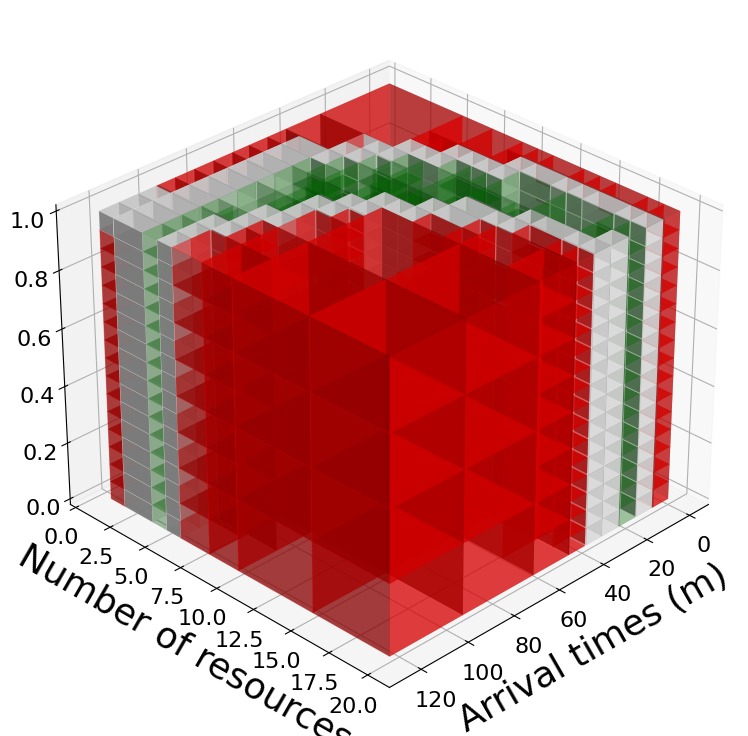

In [486]:
if params['viz']['plot_3d_InOut']:
    plot_3d_hqt_leaf_nodes(hqt_df, params)

In [484]:
# fig.subplots_adjust(left=0.3, right=0.4, top=0.16, bottom=0.15)  # Increased left and bottom margins

### 3D 3 Params

In [364]:
from src.plots import plot_param_relationships, plot_3d_results_with_target_range, plot_3d_in_out, plot_3d_in_out_interactive
if params['viz']['plot_3d_InOut']:

    for algorithm in algorithms:
        if algorithm != 'orig_run':
                
            print(f"\n ### Generating 3D In/Out plots for algorithm: {algorithm}") 
            
            # Call the function to plot the 3D graph
            angles=(5, 85)
            angles=(0, 90)
            # angles=(45, 45)

            # for area in ['in', 'out']:
            for area in ['in']:
                
                plot_3d_in_out(results_df, 
                           params, 
                           algorithm, 
                           use_connected_surface=False, 
                           angles=angles, 
                           show_points=area)

In [365]:
# %pip install plotly
# %pip install --upgrade nbformat

# import plotly.graph_objects as go

In [366]:
from src.plots import plot_param_relationships, plot_3d_results_with_target_range, plot_3d_in_out, plot_3d_in_out_interactive
# Call the function
if params['viz']['plot_3d_InOut']:

    for algorithm in algorithms:
        if algorithm != 'orig_run':
            print(f"\n ### Generating interactive 3D In/Out plots for algorithm: {algorithm}")
            plot_3d_in_out_interactive(results_df, params, algorithm=algorithm, use_connected_surface=None)
            plot_3d_in_out_interactive(results_df, params, algorithm=algorithm, use_connected_surface='in')
            plot_3d_in_out_interactive(results_df, params, algorithm=algorithm, use_connected_surface='in', show_points='in')
            plot_3d_in_out_interactive(results_df, params, algorithm=algorithm, use_connected_surface=None, show_points='in')


            # # Show only in-range points
            # plot_3d_in_out_interactive(results_df, params, algorithm=algorithm, use_connected_surface=None, show_points="in")

            # # Show only out-of-range points
            # plot_3d_in_out_interactive(results_df, params, algorithm=algorithm, use_connected_surface=None, show_points="out")

            # # Show both in-range and out-of-range points
            # plot_3d_in_out_interactive(results_df, params, algorithm=algorithm, use_connected_surface=None, show_points=None)

In [367]:
from src.plots import plot_surface_with_alpha_shape, plot_surface_with_interpolation
# Call the function


In [368]:
if params['viz']['plot_3d_InOut']:
    plot_surface_with_interpolation(results_df, params, algorithm, use_connected_surface='in')

In [369]:

from src.plots import plot_3d_connected_all_points

if params['viz']['plot_3d_InOut']:
    plot_3d_connected_all_points(results_df, params, algorithm='grid_search', use_connected_surface="in")
    plot_3d_connected_all_points(results_df, params, algorithm='grid_search', use_connected_surface="out")

In [370]:
from src.plots import plot_3d_connected_filtered_points
if params['viz']['plot_3d_InOut']:
    plot_3d_connected_filtered_points(results_df, params, algorithm='grid_search', use_connected_surface="in")
    plot_3d_connected_filtered_points(results_df, params, algorithm='hyperquadtree', use_connected_surface="in")
# plot_3d_connected_filtered_points(results_df, params, algorithm='grid_search', use_connected_surface="out")

In [371]:
## New 